Case Study 06

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn import preprocessing

# Fetching Data, made PassengerId as Index column and basic details

In [55]:
data=pd.read_csv('titanic_dataset.csv',index_col='PassengerId')
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [4]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Handling Null values

In [5]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

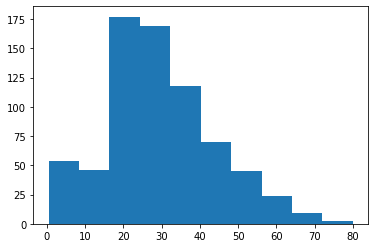

In [6]:
plt.hist(data['Age'])

In [7]:
med=data['Age'].median()
print('median age is',med)
data['Age']=data['Age'].fillna(med)

median age is 28.0


Since Age is right skewed data, the missing values is distributed by median

In [16]:
mod=data['Embarked'].mode()
print("Mode of Embarked column is %s" %(mod))
data['Embarked']=data['Embarked'].fillna(mod)

Mode of Embarked column is 0    S
dtype: object


There are only 2 missing values for Embarked, which is filled by mode

In [57]:
data.Cabin.nunique()

147

In [14]:
data.drop('Cabin',axis=1,inplace=True)

Since Cabin has multiple unique elements and does not contribute in analysis further, the column is dropped

In [17]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

All the null values are taken care of

# Handling Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0xe0b5bd05e0>,
 'caps': [<matplotlib.lines.Line2D at 0xe0b5bd0ca0>,
 'boxes': [<matplotlib.lines.Line2D at 0xe0b5bd0280>],
 'medians': [<matplotlib.lines.Line2D at 0xe0b5bdc3a0>],
 'fliers': [<matplotlib.lines.Line2D at 0xe0b5bdc700>],
 'means': []}

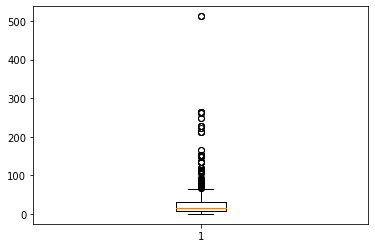

In [18]:
plt.boxplot(data['Fare'])

In [19]:
q1=np.percentile(data['Fare'],25,interpolation='midpoint')
q3=np.percentile(data['Fare'],75,interpolation='midpoint')
print('Upper Limit:',q3+1.5*(q3-q1))
print('Lower Limit:',q1-1.5*(q3-q1))

Upper Limit: 65.6344
Lower Limit: -26.724


In [20]:
outlier=[]
for x in data['Fare']:
    if(x>q3+1.5*(q3-q1) or (x<q1-1.5*(q3-q1))):
        outlier.append(x)
outlier

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 6

{'whiskers': [<matplotlib.lines.Line2D at 0xe0b5c74940>,
 'caps': [<matplotlib.lines.Line2D at 0xe0b5c82040>,
 'boxes': [<matplotlib.lines.Line2D at 0xe0b5c745e0>],
 'medians': [<matplotlib.lines.Line2D at 0xe0b5c82700>],
 'fliers': [<matplotlib.lines.Line2D at 0xe0b5c82a60>],
 'means': []}

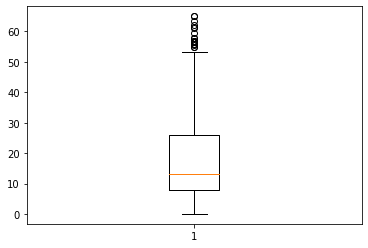

In [21]:
out=data['Fare']>q3+1.5*(q3-q1) 
out.append(data['Fare']<q1-1.5*(q3-q1))
ary=data.loc[out].index
data.drop(ary,inplace=True)
plt.boxplot(data['Fare'])

All the outliesr among the Fare parameter is removed

In [22]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,775.000000,775.00000,775.000000,775.000000,775.000000,775.000000
mean,0.339355,2.48000,28.748710,0.437419,0.340645,17.822091
std,0.473796,0.73439,12.782123,0.899838,0.785914,13.578085
min,0.000000,1.00000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.00000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.00000,28.000000,0.000000,0.000000,13.000000
75%,1.000000,3.00000,34.000000,1.000000,0.000000,26.000000
max,1.000000,3.00000,80.000000,5.000000,6.000000,65.000000


{'whiskers': [<matplotlib.lines.Line2D at 0xe0ba0a3be0>,
 'caps': [<matplotlib.lines.Line2D at 0xe0ba0b12e0>,
 'boxes': [<matplotlib.lines.Line2D at 0xe0ba0a3880>],
 'medians': [<matplotlib.lines.Line2D at 0xe0ba0b19a0>],
 'fliers': [<matplotlib.lines.Line2D at 0xe0ba0b1d00>],
 'means': []}

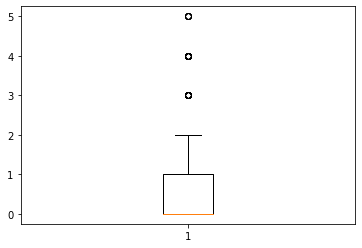

In [23]:
plt.boxplot(data['SibSp'])

In [24]:
q1=np.percentile(data['SibSp'],25,interpolation='midpoint')
q3=np.percentile(data['SibSp'],75,interpolation='midpoint')
print('Upper Limit:',q3+1.5*(q3-q1))
print('Lower Limit:',q1-1.5*(q3-q1))

Upper Limit: 2.5
Lower Limit: -1.5


[3,
 4,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 4,
 4,
 4,
 3,
 4,
 3,
 4,
 4,
 4,
 4,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 4,
 3,
 4,
 4]

{'whiskers': [<matplotlib.lines.Line2D at 0xe0ba10e160>,
 'caps': [<matplotlib.lines.Line2D at 0xe0ba10e820>,
 'boxes': [<matplotlib.lines.Line2D at 0xe0ba0ffdc0>],
 'medians': [<matplotlib.lines.Line2D at 0xe0ba10eee0>],
 'fliers': [<matplotlib.lines.Line2D at 0xe0bc067280>],
 'means': []}

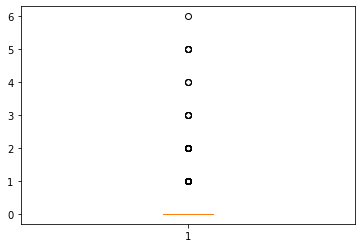

In [26]:
plt.boxplot(data['Parch'])

In [28]:
q1=np.percentile(data['Parch'],25,interpolation='midpoint')
q3=np.percentile(data['Parch'],75,interpolation='midpoint')
print('Upper Limit:',q3+1.5*(q3-q1))
print('Lower Limit:',q1-1.5*(q3-q1))

Upper Limit: 0.0
Lower Limit: 0.0


In [30]:
outlier=[]
for x in data['Parch']:
    if(x>q3+1.5*(q3-q1) or x<q1-1.5*(q3-q1)):
        outlier.append(x)
outlier

[1,
 2,
 1,
 5,
 1,
 1,
 5,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 3,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 4,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 3,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 4,
 1,
 2,
 1,
 1,
 2,
 5,
 2,
 1,
 1,
 1,
 2,
 1,
 5,
 2,
 1,
 1,
 1,
 1,
 6,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 2,
 1,
 3,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 5,
 2]

Analysing the outliers of 'SibSp' and 'Parch' and understanding about the domain, the parameters are not worth removing 

In [ ]:
plt.boxplot(data['Age'])

In [32]:
q1=np.percentile(data['Age'],25,interpolation='midpoint')
q3=np.percentile(data['Age'],75,interpolation='midpoint')
print('Upper Limit:',q3+1.5*(q3-q1))
print('Lower Limit:',q1-1.5*(q3-q1))

Upper Limit: 52.0
Lower Limit: 4.0


In [35]:
outlier=[]
for x in data['Age']:
    if(x>q3+1.5*(q3-q1) or x<q1-1.5*(q3-q1)):
        outlier.append(x)
outlier

[54.0,
 2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 3.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 3.0,
 2.0,
 59.0,
 54.0,
 62.0,
 3.0,
 65.0,
 54.0,
 61.0,
 2.0,
 3.0,
 3.0,
 1.0,
 1.0,
 3.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 54.0,
 2.0,
 64.0,
 62.0,
 62.0,
 53.0,
 54.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 70.0,
 60.0,
 60.0,
 0.67,
 57.0,
 54.0,
 1.0,
 0.42,
 2.0,
 1.0,
 0.83,
 74.0]

In [37]:
outlier=[]
for x in data['Age']:
    if(x<0):
        outlier.append(x)
outlier

[]

There are no ows having age less than zero, hence the outliers are not worth removing

# Min max scalling considering Survived as traget

In [44]:
from sklearn import preprocessing
#data1=data.drop('Ticket',axis=1,inplace=True)
data1=data.drop('Name',axis=1,inplace=True)
data1=pd.get_dummies(data)
data1

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1,0,0,1
3,1,3,26.0,0,0,7.9250,1,0,0,0,1
4,1,1,35.0,1,0,53.1000,1,0,0,0,1
5,0,3,35.0,0,0,8.0500,0,1,0,0,1
6,0,3,28.0,0,0,8.4583,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0000,0,1,0,0,1
888,1,1,19.0,0,0,30.0000,1,0,0,0,1
889,0,3,28.0,1,2,23.4500,1,0,0,0,1


In [51]:
y=data1['Survived']
x=data1.drop('Survived',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)
lreg=linear_model.LinearRegression()
model=lreg.fit(x_train,y_train)
pred=model.predict(x_test)
print('The Mean Squared Error value is', mean_squared_error(y_test,pred))
print('R-Squared value is', r2_score(y_test,pred))

The Mean Squared Error value is 0.16112044788808122
R-Squared value is 0.28735113682973024


In [53]:
minmax=preprocessing.MinMaxScaler(feature_range=(0,1))
x=minmax.fit_transform(x)
x=pd.DataFrame(x)

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)
lreg=linear_model.LinearRegression()
model=lreg.fit(x_train,y_train)
pred=model.predict(x_test)
print('The Mean Squared Error value is', mean_squared_error(y_test,pred))
print('R-Squared value is', r2_score(y_test,pred))

The Mean Squared Error value is 0.16076077628381474
R-Squared value is 0.2889419936281993


There is a mariginal change in MSE value and R squared value after scalling